#### Supervised Learning Algorithms - Linear Regression
- Use House Price dataset to create a Simple Linear Regression model.
- Predict the scores on the test data and output RMSE and R Squared Score.
- Include appropriate code snippets to visualize the model.
- Interpret the result.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataset/Housing.csv")
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
120,5950000,6540,3,1,1,yes,yes,yes,no,no,2,yes,furnished
127,5880000,6500,3,2,3,yes,no,no,no,yes,0,no,unfurnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
158,5495000,7980,3,1,1,yes,no,no,no,no,2,no,semi-furnished
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished


In [3]:
df.shape

(545, 13)

In [4]:
df.duplicated().sum()
df.dropna(inplace=True)

In [5]:
df.shape

(545, 13)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
x = df.drop(['price'], axis = 1)
y = df.drop(x.columns, axis = 1)

In [8]:
x.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [9]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']

for col in cols:
    x[col] = le.fit_transform(x[col])

In [10]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"r2 : {r2}")
print(f"rmse : {rmse}")

r2 : 0.6494754192267804
rmse : 1331071.4167895105


##### visualize the result

In [17]:
import matplotlib.pyplot as plt

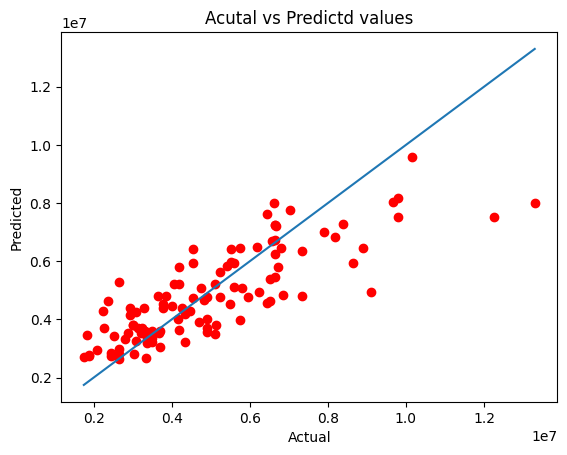

In [21]:
plt.scatter(y_test, y_pred, color = 'red')
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.title("Acutal vs Predictd values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [19]:
coff = model.coef_
intercept = model.intercept_

In [20]:
print(f"Coff: ", coff)
print(f"intercept: ", intercept)

Coff:  [[ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
   3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
   7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]]
intercept:  [293083.06915067]
